---
# Cluster analysis
---

Author: Dr. Julia Jerke, University of Zurich  
Date: November 25, 2021  
contact: jerke@soziologie.uzh.ch




## Overview:
1. Loading the data and data inspection
2. K-means cluster analysis
3. Agglomerative cluster analysis

---
---
---

## 1. Loading the data and data inspection

We start by importing the relevant modules. We will need:
- `pandas` to load and work with the data frame
- `matplotlib` for plotting our cluster solutions
- `numpy` as basis for data transformation and `scikit-learn`
- `os` to set the working directory

(We will import the libraries that we need for the cluster analysis later!)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



happy = pd.read_csv("world_happiness_2019.csv")

In [2]:
happy.head()

,Unnamed: 0,rank,country,score,gdp,support,life,choices,generosity,corruption,continent,develop
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe,0.0
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe,0.0
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe,0.0
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe,0.0
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe,0.0


In [3]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  156 non-null    int64  
 1   rank        156 non-null    int64  
 2   country     156 non-null    object 
 3   score       156 non-null    float64
 4   gdp         156 non-null    float64
 5   support     156 non-null    float64
 6   life        156 non-null    float64
 7   choices     156 non-null    float64
 8   generosity  156 non-null    float64
 9   corruption  156 non-null    float64
 10  continent   156 non-null    object 
 11  develop     156 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 14.8+ KB


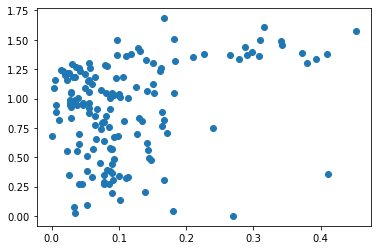

In [4]:
plt.scatter("corruption","gdp",data=happy)

## 2. K-means cluster analysis

We will first run a K-means clustering analysis.  
The structure is as follows:
- Data preparation
- Running the cluster analysis
- Cluster statistics and labelling
- Choosing the appropriate number of clusters

We first have to import the necessary modules. There are a few libraries that allow the estimation of cluster analyses such as **Scipy** or **Scikit-learn**. 

Here, we will make use of **scikit-learn**. Scikit-learn is very powerful open source library that has been developed for machine learning.

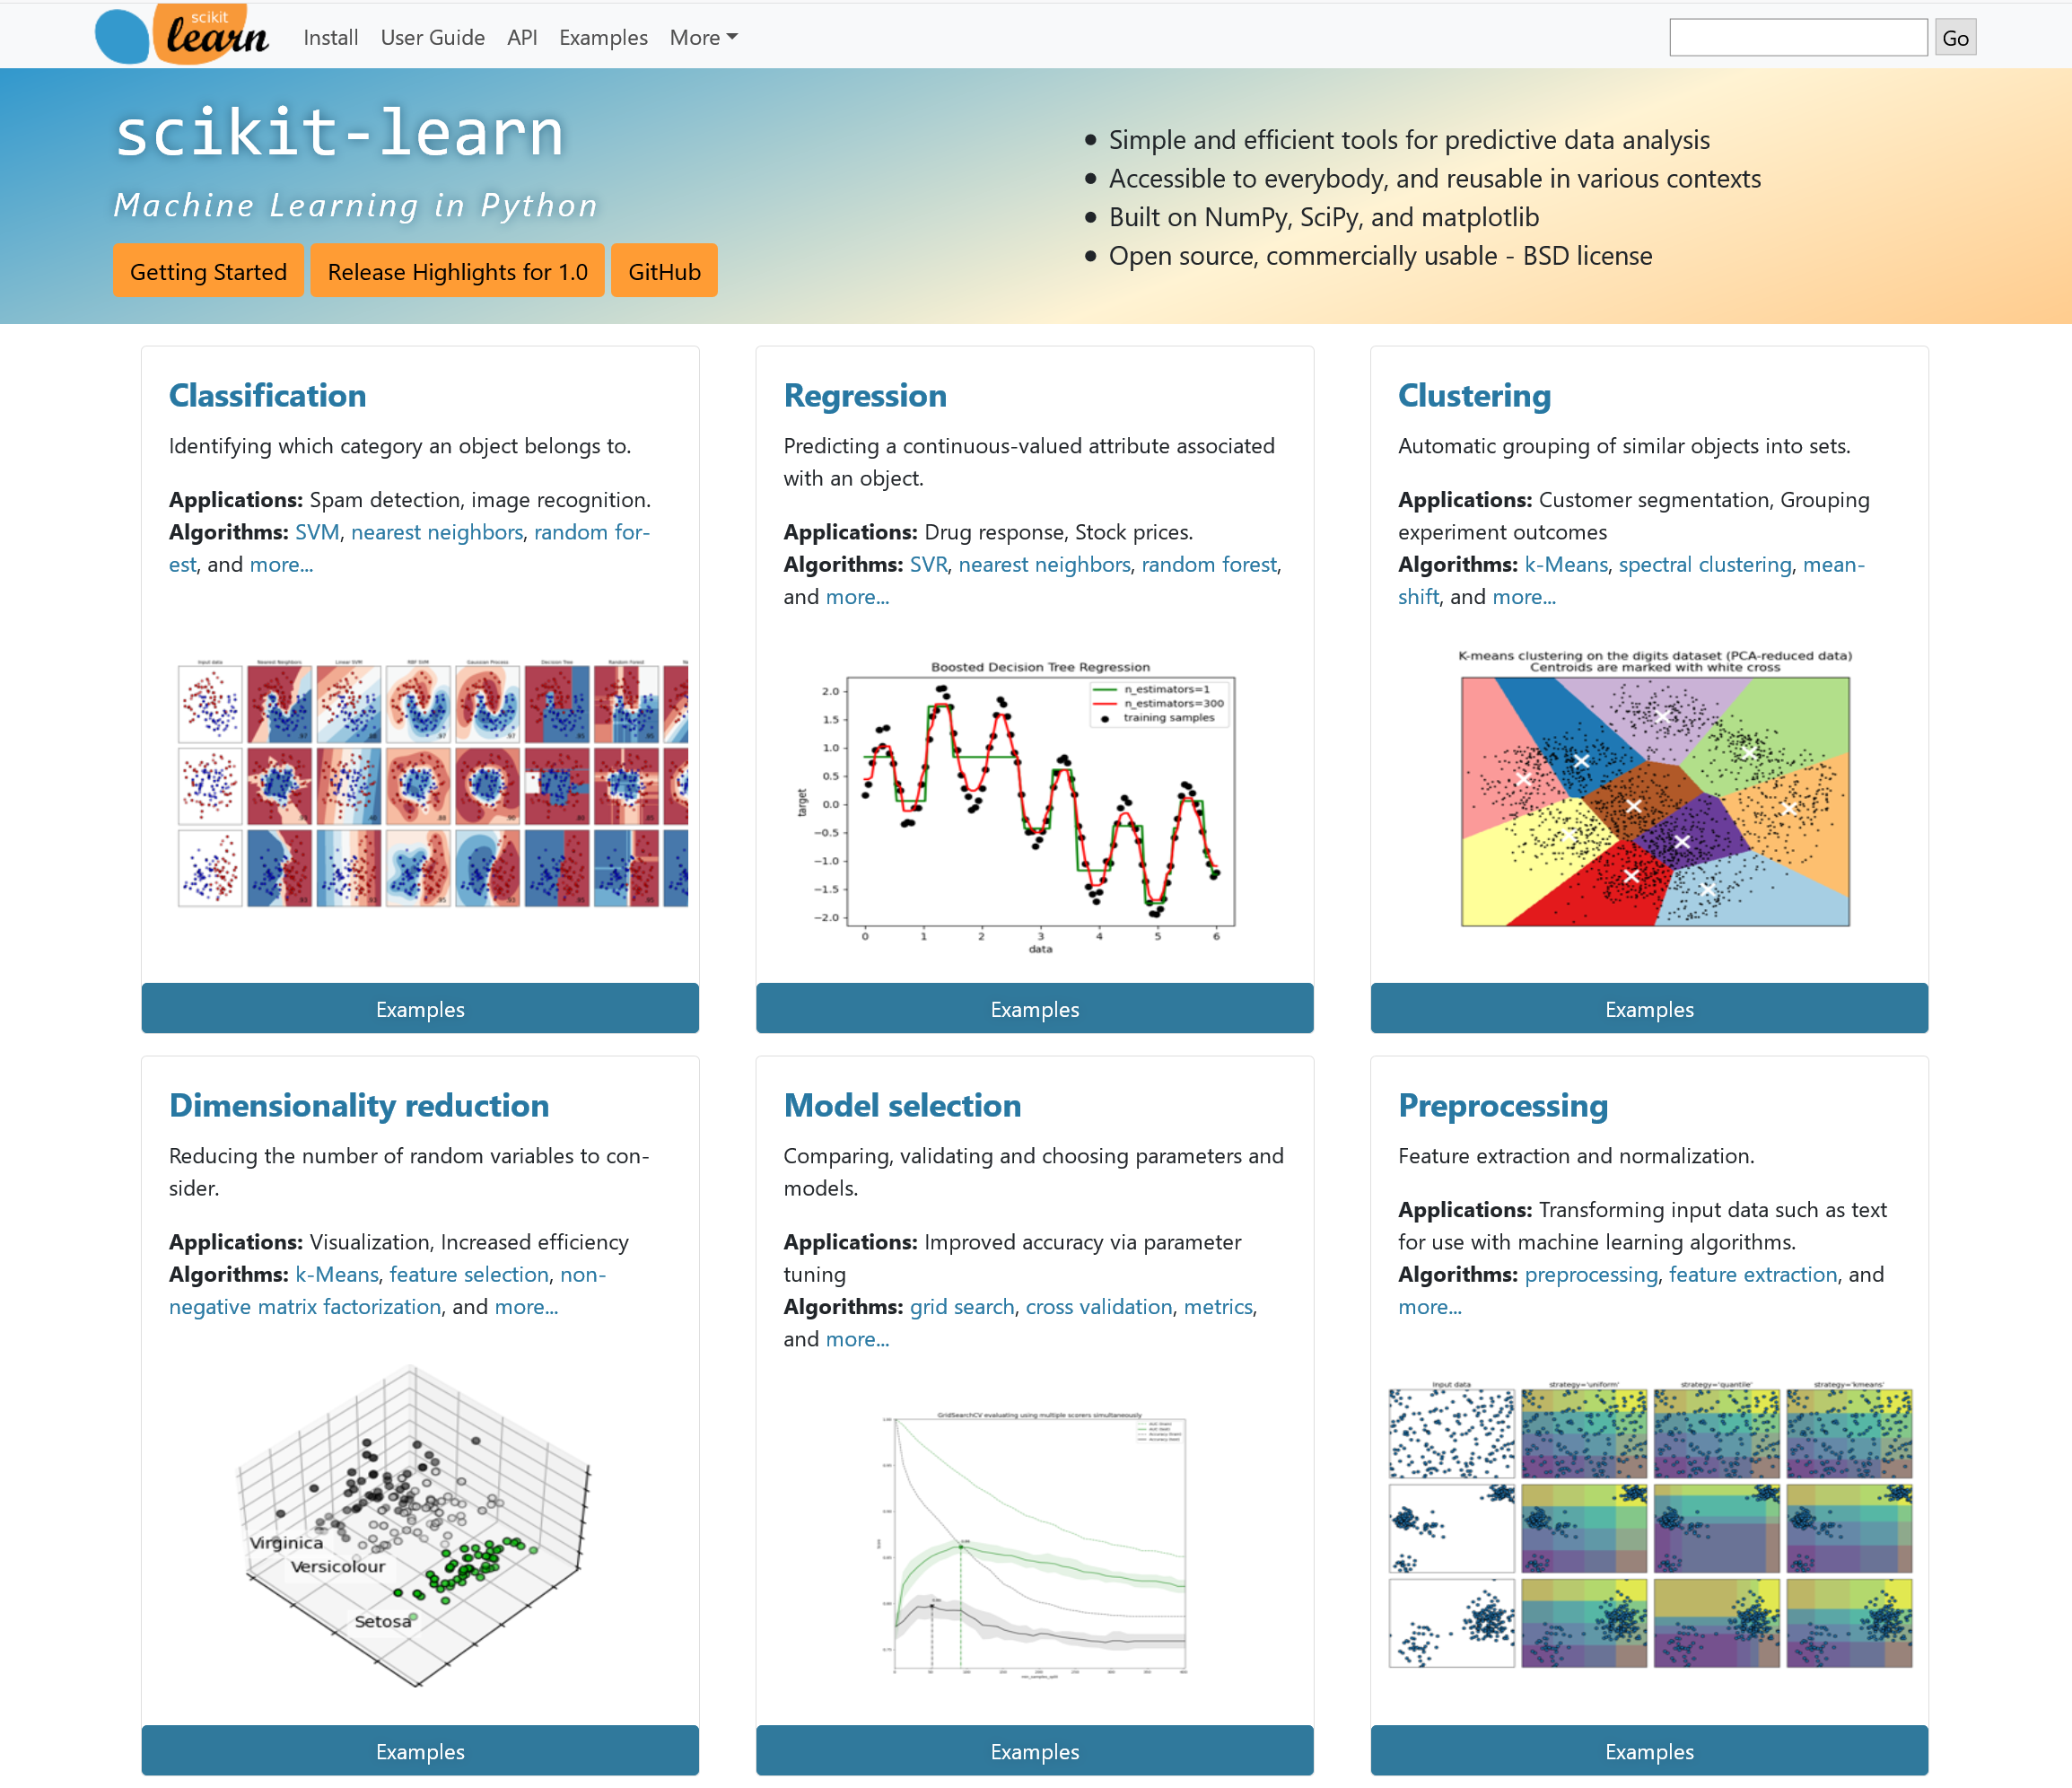

See the comprehensive documentation for an overview and more information: https://scikit-learn.org/stable/index.html

In [5]:
from sklearn.preprocessing import StandardScaler # we need that to standardize our variable in the pross of the data preparation
from sklearn.cluster import KMeans # that will run the actual cluster analysis

### Data preparation

In most cases we have to prepare the data for the cluster analysis to yield valid results.  
We will do that in three steps:
1. _Data selection_: We have to select the subset of variables that we will use for the cluster analysis.
2. *Checking the data type*: K-means requires numerical and continuous data. As such, the algorithm does not accept categorical data. Further, it is optimal to pass array-like data (e.g. using _numpy_) to the algorithm. However, often _pandas_ data frames work well, too. For that, we have to make sure that all variables used for the cluster analysis are of appropriate _dtype_. You can check that with `happy.info()`, the value in the column _Dtype_ must not be _"object"_.
3. *Standardization*: Usually, variables are measured on different scales. Cluster methods are sensitive to different scales of the variables and, therefore, results might be biased if not taking into account. For instance: if we use the variables _age_ and _income_, the variable _income_ will have a stronger influence on the clustering  as _income_ is measured much higher in absolute magnitude. Since the clustering algorithm is based on distance between observations, the distances with respect to _income_ will generally be larger than those for _age_ and, therefore, affect the estimation much more. One solution is to standardize the variables, for instance with normal transformation.

#### 1. Data selection

For simplicty, we start with two variables to build our clusters. Here, we will work with _gdp_ and _corruption_.

In [6]:
happy_cluster = happy[["corruption","gdp"]]

#### 2. Checking the data type

In [7]:
print(happy_cluster.info())
print(happy_cluster.describe())

# All good!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   corruption  156 non-null    float64
 1   gdp         156 non-null    float64
dtypes: float64(2)
memory usage: 2.6 KB
None
       corruption         gdp
count  156.000000  156.000000
mean     0.110603    0.905147
std      0.094538    0.398389
min      0.000000    0.000000
25%      0.047000    0.602750
50%      0.085500    0.960000
75%      0.141250    1.232500
max      0.453000    1.684000


#### 3. Standardization

There are different ways to preprocess and prepare your data. See the documentation for an overview of transformation procedures: https://scikit-learn.org/stable/modules/preprocessing.html

We will apply one of the most common transformations, the standard normal transformation. The values are transformed in such way that the new variable has mean 0 and variance 1. Therefore, we substract the mean from each value and divide by the standard deviation:
$$ x_{i}\_trans = \frac{x_i - \bar{X}}{s_X}, ~ ~~\forall i \in \{1,...,n\}$$

The `StandardScaler()` will perform this transformation for us. We first have to call the class and then apply it to our specific data.

In [8]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the StandardScaler to our specific data set and store the results into a new data set (note: the result will automatically be a numpy array)
scaled_happy_cluster = scaler.fit_transform(happy_cluster)

Checking the transformation...

In [9]:
# Checking the transformation result by having a look at the first 5 lines in the old and the transformed data set
print(happy_cluster.head())
print(scaled_happy_cluster[:5]) # since it is now a numpy array, we cannot use pandas methods anymore

   corruption    gdp
0       0.393  1.340
1       0.410  1.383
2       0.341  1.488
3       0.118  1.380
4       0.298  1.396
[[2.99675712 1.09504166]
 [3.17715844 1.20332385]
 [2.4449413  1.46773387]
 [0.07850042 1.19576928]
 [1.98863208 1.23606033]]


In [33]:
# Printing the mean and variance of the transformed corruption variable
print(scaled_happy_cluster[:,0].mean())
print(scaled_happy_cluster[:,0].var())

-6.832141690000964e-17
1.0


Let's check the transformation for one example value...

In [11]:
old_val = happy_cluster.iloc[0,0]
mean = happy_cluster.corruption.mean()
std = happy_cluster.corruption.std()
new_val = (old_val - mean)/std
scaler_val = scaled_happy_cluster[0,0]

print("Old value: " + str(old_val) + 
      "\nCalculated new value: " + str(new_val) + 
      "\nTransformed value from the StandradScaler: " + str(scaler_val))

Old value: 0.393
Calculated new value: 2.987136682364307
Transformed value from the StandradScaler: 2.996757115265599


The small difference in results can be explained by a minor difference in how the sample variance, and hence the standard deviation, is calculated in _pandas_ and _sciokit_learn_.

In [12]:
print("Pandas std: " + str(happy_cluster.corruption.std()))
print("Scikit-learn std: " + str(scaler.scale_[0]))

Pandas std: 0.09453783536745278
Scikit-learn std: 0.09423434233588443


In [13]:
# Alligning the two different standard deviations
print(np.sqrt(happy_cluster.corruption.std()**2 * 155 / 156))

0.09423434233588442


Note that the standardization does not change the structure of the data and the relationship between the variables.

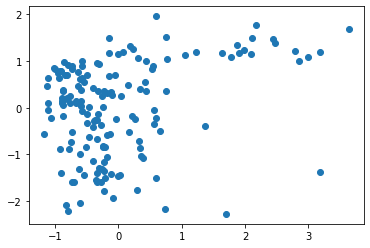

In [14]:
plt.scatter(scaled_happy_cluster[:,0],scaled_happy_cluster[:,1])

### Running the cluster analysis

The data is now prepared and we can start the cluster anylsis. Running the cluster analysis involves two essential steps:
1. Initializing the cluster model using the `Kmeans` method
2. Estimating the cluster model using `model.fit()`

The analysis then takes the form:
```python
model = KMeans(parameter) # First step: instantiation
model.fit(data) # Second step: estimating the cluster model
```

While instantiating the K-means model, we already set the parameters of the algorithm. The most important are:
- `n_clusters`: Number of clusters that we want to fit to the data
- `init`: The algorithm with which the initial cluster centroids will be determined (_"random_": for each cluster, randomly pick a row from the data set as the centroid for that cluster; _"k-means++"_: an improve algorithm that determines the initial centroid in such way that they are further away from each other)
- `n_init`: The number of times that the K-means algorithm will be repeated. As we have seen before, K-means clustering is non-deterministic, hence different runs (and different initial centroids) will produce different cluster solutions. For more robust result, the estimation is repeated _n_init_ times and the solution with the lowest inertia is chosen.
- `random_state`: The initial centroids are randomly determined. To make results reproducible, this parameter allows chosing a random seed.



In [15]:
# First step: instantiate the K-means model
kmeans = KMeans(n_clusters=5, init="random", n_init=10, random_state=42)


# Second step: estimating the cluster model
kmeans.fit(scaled_happy_cluster)

KMeans(init='random', n_clusters=5, random_state=42)

### Cluster statistics and labelling

After having estimated a cluster model, we can check cluster statistics and assign the observations to their respective clusters. Cluster statisics entail for instance the centroids of the cluster solution, the inertia (the SSE - the heterogeneity within the clusters) or the number of iterations that were necessary to converge to a cluster solution.

First, we'll have a look at some cluster statistics:

In [16]:
# Printing the centroids of our 5 clusters
centroids = kmeans.cluster_centers_
centroids

array([[ 0.31991984,  0.98508067],
       [-0.02266581, -0.51777551],
       [-0.26792489, -1.52330799],
       [ 2.4449413 ,  1.13108326],
       [-0.68748166,  0.38211899]])

In [17]:
# Printing the inertia, a measure for the heterogeneity within the clusters
kmeans.inertia_

53.89755560816692

In [18]:
# Printing the number of iterations till convergence
kmeans.n_iter_

9

Next, we want to assign the observations in our data set to their respective cluster. We therefore store the cluster labels into a new variable that we append to our original data set.

In [19]:
happy_cluster["cluster"] = kmeans.labels_

C:\Users\jjerke\AppData\Local\Temp/ipykernel_15428/3432804189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_cluster["cluster"] = kmeans.labels_


In [20]:
happy_cluster.head()

,corruption,gdp,cluster
0,0.393,1.340,3
1,0.410,1.383,3
2,0.341,1.488,3
3,0.118,1.380,0
4,0.298,1.396,3


Finally, we can plot our cluster solution. We therefore draw a scatter plot with our variables _corruption_ and _gdp_. Using the parameter `c="varname"`, we can color our observations according to their cluster assignment. 

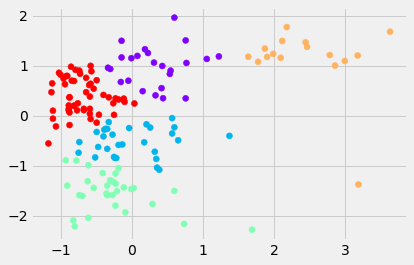

In [21]:
plt.style.use("fivethirtyeight")

plt.scatter(scaled_happy_cluster[:, 0], scaled_happy_cluster[:, 1],c=kmeans.labels_,cmap="rainbow")

Further, we can add the location of the cluster centroids to the scatter plot.

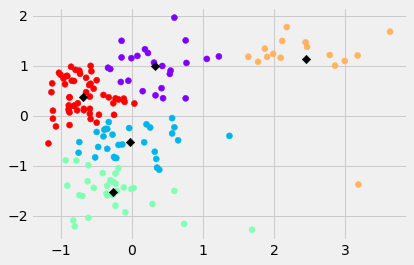

In [22]:
plt.scatter(scaled_happy_cluster[:, 0], scaled_happy_cluster[:, 1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(centroids[:,0],centroids[:,1],c="black",marker="D")

### Choosing the appropriate number of clusters

As discussed in the lecture, the K-means algorithm requires us to determine the number of clusters in advance. But how can we decide on the optimal number of clusters without any previous knowledge?

A solution for that problem is to run cluster analyses for various numbers of clusters and decide for the number of clusters that provides the best cluster solution.

How can we determine the best cluster solution. Two methods:
1. Ellbow method
2. Silhouette coefficient

In this script, we will discuss the ellbow method. First, we have to estimate cluster models for different cluster numbers. That can be achieved by creating a loop over the number of clusters _k_ when instantiating the cluster model.

In [23]:
# First, we define an empty list that will later store the inertia from each iteration over the cluster numbers
inertia = []

# Second, we loop over the number of clusters k
for k in range(1, 10):  # we estimate cluster solutions for 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, init="random", n_init=10, random_state=42) # instantiating the cluster model but with varying k
    kmeans.fit(scaled_happy_cluster) # estimating the cluster model
    inertia.append(kmeans.inertia_) # adding the inertia value from the current round (the current k) to the list that is collecting the inertia value for all rounds

C:\Users\jjerke\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


To decide on the optimal number of clusters we plot a so-called **elbow plot**. It plots the inertia against the number of clusters. With increasing number of clusters, the inertia will always decrease (more centroids lead to reduced distances and therefore less heterogeneity). However, we need to find the point that ensure a trade-off between the error and the number of clusters. That point is the _elbow point_ and defined as the point where the curve is bending.

Text(0, 0.5, 'SSE')

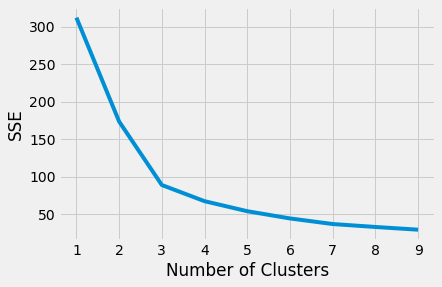

In [24]:
fig, ax = plt.subplots()
ax.plot(range(1, 10), inertia)
ax.set_xticks(range(1, 10))
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("SSE")

Here, three clusters seem to be a good solution.

This method relies on visual inspection. There also exists a method that automatically identifies the _elbow point_.

For that, we make use of the `kneed` library. It is not pre-installed in the Anaconda distribution. To manually install the library open, the Anaconda (Powershell) Prompt and type `conda install -c conda-forge kneed`.

In [25]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), inertia, curve="convex", direction="decreasing")
kl.elbow

3

## 3. Agglomerative cluster analysis

We first have to import the necessary modules. we will again use the **Scikit-learn** and import the relevant method `AgglomerativeClustering`.


In [26]:
from sklearn.cluster import AgglomerativeClustering

Since we already prepared our data for the K-means cluster analysis, we do not need to repat that step. we can, therefore, directly start with our cluster analysis.

### Running the cluster analysis

As before, running the cluster analysis involves two essential steps:
1. Initializing the cluster model using the `Kmeans` method
2. Estimating the cluster model using `model.fit()`

The analysis then takes the form:
```python
model = AgglomerativeClustering(parameter) # First step: instantiation
model.fit(data) # Second step: estimating the cluster model
```

While instantiating the agglomerative clustering model, we already set the parameters of the algorithm. The most important are
- `linkage`: Decision on how the distance between two clusters should be calculated ("ward", "complete", "average", "single", default = "ward")
- `n_clusters`: The number of clusters that should be build (default is 2)
- `distance_treshold`: The linkage distance threshold above which, clusters will not be merged.

**Note**: The last two parameters decide how the cluster solution should be determined. Remember that the agglomerative clustering algorithm starts with $N$ clusters - one for each observation. In each round the two closest clusters will be merged to one cluster. This procedure is repeated either until `n_clusters`were formed or until the distance between the next closest clusters to be merged is larger than `distance_threshold`.

In [27]:
agglo = AgglomerativeClustering(n_clusters=5)
agglo.fit(scaled_happy_cluster)

AgglomerativeClustering(n_clusters=5)

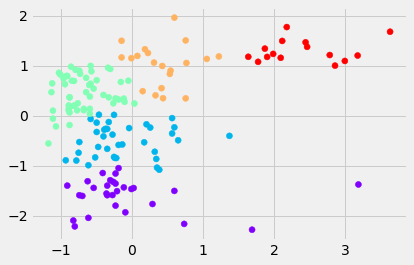

In [28]:
plt.scatter(scaled_happy_cluster[:, 0], scaled_happy_cluster[:, 1],c=agglo.labels_,cmap="rainbow")

### Plotting a dendrogram

To plot the dendrogram, we borrow from the `scipy` library that provides a method to plot the dendrogram.

We first have to import the library and the method that we will need.

In [29]:
from scipy.cluster.hierarchy import dendrogram

The following code is copied from the _scikit-learn_ documentation (https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py)

This sequence defines a new fuction called `plot_dendrogram` that we can later use for our application.

In [30]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

We repeat our agglomerative clustering from before. This time, we have to set `distance_threshold=0` and `n_clusters=None` in order to get the full tree. To plot the dendrogram, we will use the previously defined function `plot_dendrogram`.

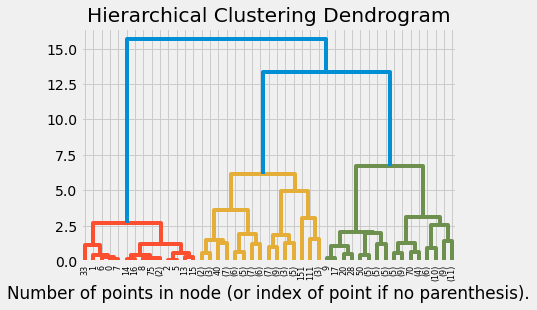

In [32]:
# Setting distance_threshold=0 ensures we compute the full tree.
agglo = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

clusters = agglo.fit(scaled_happy_cluster)

# Plotting the dendrogram
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(clusters, truncate_mode="level", p=5) # we plot the top four levels of the dendrogram
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()